In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.html.widgets import interact
from ipywidgets import interact
%matplotlib inline

In [5]:
plt.style.use("ggplot")
np.random.seed(123)

In [11]:
# 100個の０から１までの乱数のくみ
NMC = 100
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

r = (xmc ** 2 + ymc ** 2) ** 0.5

# 入っているかどうかの判定
accept = np.where(r<=1, 1, 0)

# 確率にする
accept_ratio = np.sum(accept) / NMC

print(accept_ratio)

0.79


In [12]:
NMC = 100
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
@interact(mcs=(0,NMC,1))


def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1,0.001)
    y = (1 - x ** 2) ** 0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2,alpha=0.3)
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    plt.scatter(xmc[:mcs], ymc[:mcs], color="black", marker=".")
    plt.show()
    print("Monte Carlo: ",accept_ratio)
    print("Analytical Solution: ", np.pi / 4.0)

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))

In [32]:
pi_mcs = []

NMC = 2000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

for mcs in range(1,NMC):
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [33]:
pi_x = np.arange(len(pi_mcs)) + 1

Text(0, 0.5, 'accept ratio')

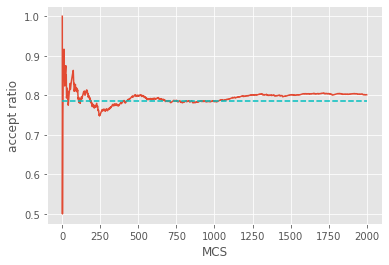

In [34]:
plt.plot(pi_x, pi_mcs)
plt.hlines(np.pi/4, pi_x[0], pi_x[-1], linestyles="dashed", color='c')  # 0.785
plt.xlabel("MCS")
plt.ylabel("accept ratio")